<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/LW_APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 Phone pe (com.phonepe.app)

2 Google pay (com.google.android.apps.nbu.paisa.user)

3 PayTM (net.one97.paytm)

4 Mobikwik (com.mobikwik_new)

5 PhonPe business(com.phonepe.app.business)

6 BharatPe (com.bharatpe.app)
 

In [3]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.loanwalle.personalloan',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=100000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [4]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,61fdf9cc-3254-4b04-9f35-b942017ee0e6,Shriram Ramesh,https://play-lh.googleusercontent.com/a-/ACB-R...,I am a regular customer. I have signed the agr...,2,8,1.2.6,2023-01-09 08:35:03,None,NaT,1.2.6
1,8bb52022-cfdf-4f51-b7bd-b7d44f2c6580,Shaddu Khan,https://play-lh.googleusercontent.com/a-/ACB-R...,The services offered are pathetic as I have cl...,1,12,1.2.6,2022-12-10 08:59:16,None,NaT,1.2.6
2,89fbfb0d-22ff-449a-81f0-ac9fce95cfa5,koneru bose,https://play-lh.googleusercontent.com/a-/ACB-R...,I has uploaded all the details for loan proces...,1,0,1.2.6,2023-04-22 15:04:34,None,NaT,1.2.6
3,15962a4d-ea9d-4ecc-8468-e5c9974cd4b9,Yogesh Kharve,https://play-lh.googleusercontent.com/a-/ACB-R...,Didn't like the apps much more i have applying...,1,0,None,2023-04-19 19:34:15,None,NaT,None
4,2bd4cb42-b3d2-4f8d-a611-6bd129e34ca0,Praveen Harikantra,https://play-lh.googleusercontent.com/a/AGNmyx...,The app is good. I availed 2 times. 3rd time a...,3,25,34,2022-02-04 05:38:29,None,NaT,34


In [5]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              452 non-null    object        
 1   userName              452 non-null    object        
 2   userImage             452 non-null    object        
 3   content               452 non-null    object        
 4   score                 452 non-null    int64         
 5   thumbsUpCount         452 non-null    int64         
 6   reviewCreatedVersion  272 non-null    object        
 7   at                    452 non-null    datetime64[ns]
 8   replyContent          12 non-null     object        
 9   repliedAt             12 non-null     datetime64[ns]
 10  appVersion            272 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 39.0+ KB


In [6]:
#df_reviews.to_csv('12club_review.csv')

In [7]:
# Count number of review scores
df_reviews['score'].value_counts()

5    243
1    168
4     23
2     10
3      8
Name: score, dtype: int64

<Axes: ylabel='score'>

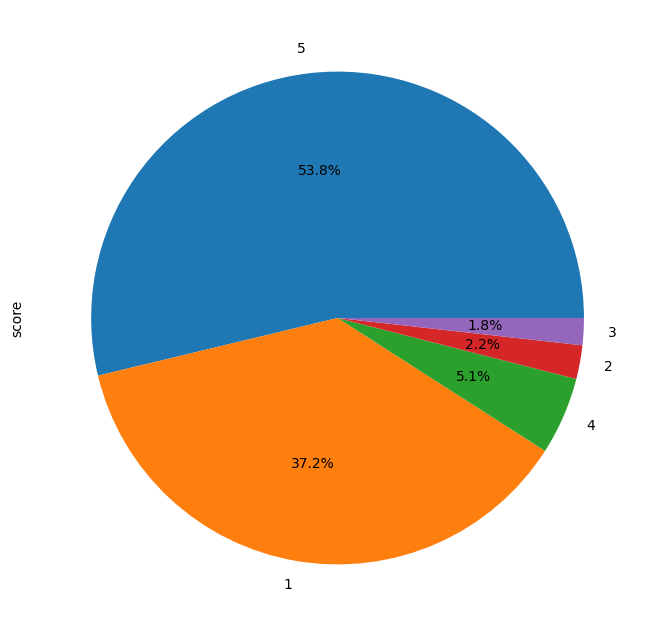

In [8]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [9]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [10]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,I am a regular customer. I have signed the agr...,2
1,The services offered are pathetic as I have cl...,1
2,I has uploaded all the details for loan proces...,1
3,Didn't like the apps much more i have applying...,1
4,The app is good. I availed 2 times. 3rd time a...,3


Install azure text analytics API

In [11]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.5 MB/s eta 0:00:00


In [12]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [13]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [14]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Review Content: I am a regular customer. I have signed the agreement 3 days ago, and haven't got the disbursement. Also, customer care, chat and emails don't get picked up or answered by anyone. No customer service, except one day before due date when 2-3 people reach out. And they ask for a good review after charging 365% APR with zero customer service. Very bad experience, do not recommend this to anyone.
Review Content Sentiment: mixed
Review Content Score: 2
Review Content: The services offered are pathetic as I have cleared the loan on due date but still have to wait one week for the noc . Everytime I get the same message of fixing some technical issues. What technical issues you guys have to face to provide for the noc as you haven't faced the same for receiving the loan due amount . For the due amount you guys start to message 4 days prior and forcing us to pay with charging a high amount of interest. I will not recommended this app to anyone .
Review Content Sentiment: negative

In [15]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    260
negative    145
mixed        24
neutral      23
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

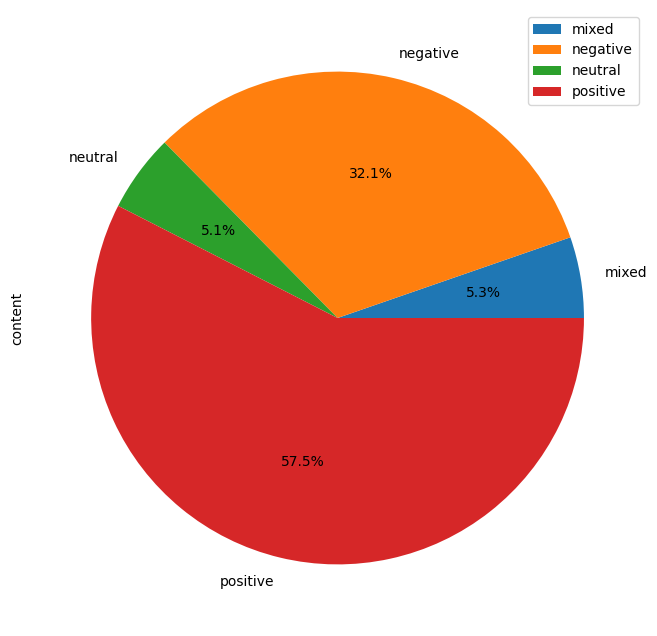

In [16]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [17]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                  9
           2                  3
           3                  2
           4                  1
           5                  9
negative   1                139
           2                  4
           3                  1
           4                  1
neutral    1                 12
           2                  2
           3                  1
           4                  1
           5                  7
positive   1                  8
           2                  1
           3                  4
           4                 20
           5                227
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

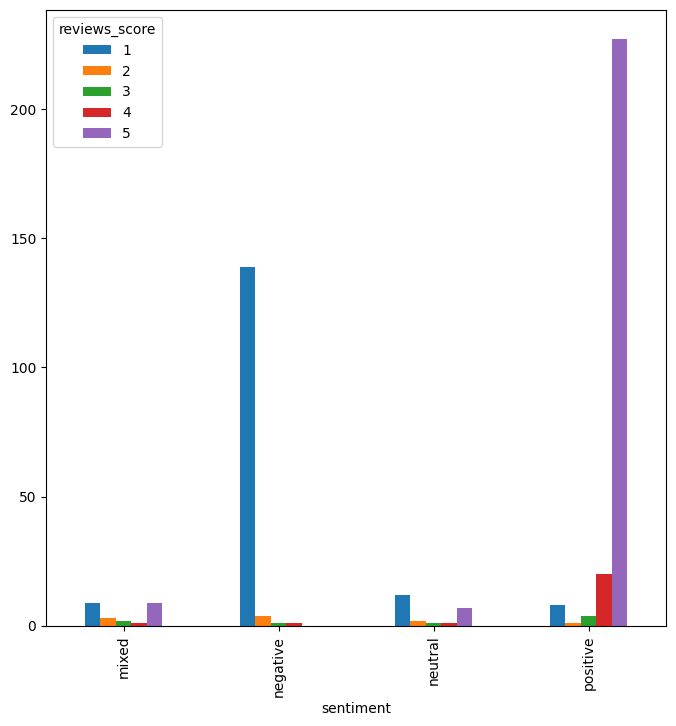

In [18]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [19]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        452 non-null    object
 1   sentiment      452 non-null    object
 2   reviews_score  452 non-null    object
dtypes: object(3)
memory usage: 10.7+ KB


In [20]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [21]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [22]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [23]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        452 non-null    object
 1   sentiment      452 non-null    int64 
 2   reviews_score  452 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [24]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                  9
           2                  3
           3                  2
           4                  1
           5                  9
1          1                139
           2                  4
           3                  1
           4                  1
2          1                  8
           2                  1
           3                  4
           4                 20
           5                227
3          1                 12
           2                  2
           3                  1
           4                  1
           5                  7
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

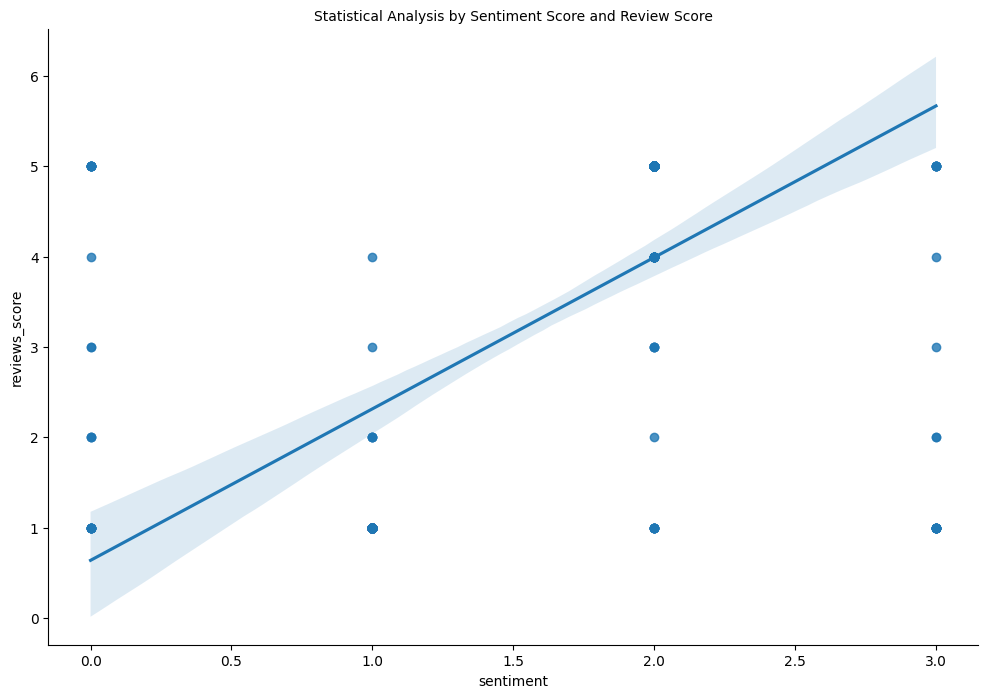

In [25]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.